# MOT LOADING DYNAMICS

In [29]:
import datarun_worksforsizeVSnum_new as dr

#plotting packages
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib
#data analysis
import numpy as np
import os
from scipy.optimize import curve_fit
from scipy.stats import linregress, chi2

#error propagation
from uncertainties import ufloat
from uncertainties import unumpy as unp
from uncertainties.umath import *


In [2]:
numtrials=16
d = dr.Experiment(
    vlist=[10,20,40,60,80],
    idx_start = 164,
    datapath = os.path.join(os.getcwd(),'load_time'),
    numtrials = numtrials,
    mask=0.1
)

on 0: /Users/Ruobin/Desktop/YALE/Spring2023/PHYS382L/MOTsArentForKids/datarun_worksforsizeVSnum_new.py:163: RuntimeWarning: divide by zero encountered in true_divide
        od_arr = np.log(np.divide(I_arr, I0_arr))
/Users/Ruobin/Desktop/YALE/Spring2023/PHYS382L/MOTsArentForKids/datarun_worksforsizeVSnum_new.py:163: RuntimeWarning: invalid value encountered in true_divide
        od_arr = np.log(np.divide(I_arr, I0_arr))


on 30: skip image 194                                                                                                   
on 65: skip image 229                                                                                                   
|████████████████████████████████████████| 80/80 [100%] in 2:02.8 (0.65/s)                                              


# LOADING DYNAMICS

In [3]:
print(len(d.data))
def loading_dyn(x,a,b):
    return a/b*(1-np.exp(-x*b))
# N_list = d.structure_data(lambda d: d.atom_number())
N_list={time:[] for time in d.vlist}
for datum in d.data:
    N_list[datum.value].append(datum.atom_number_px_sum())


78


[1.30196039e+06 3.31465817e-02]
[2.63064866e+05 1.10204542e-02]


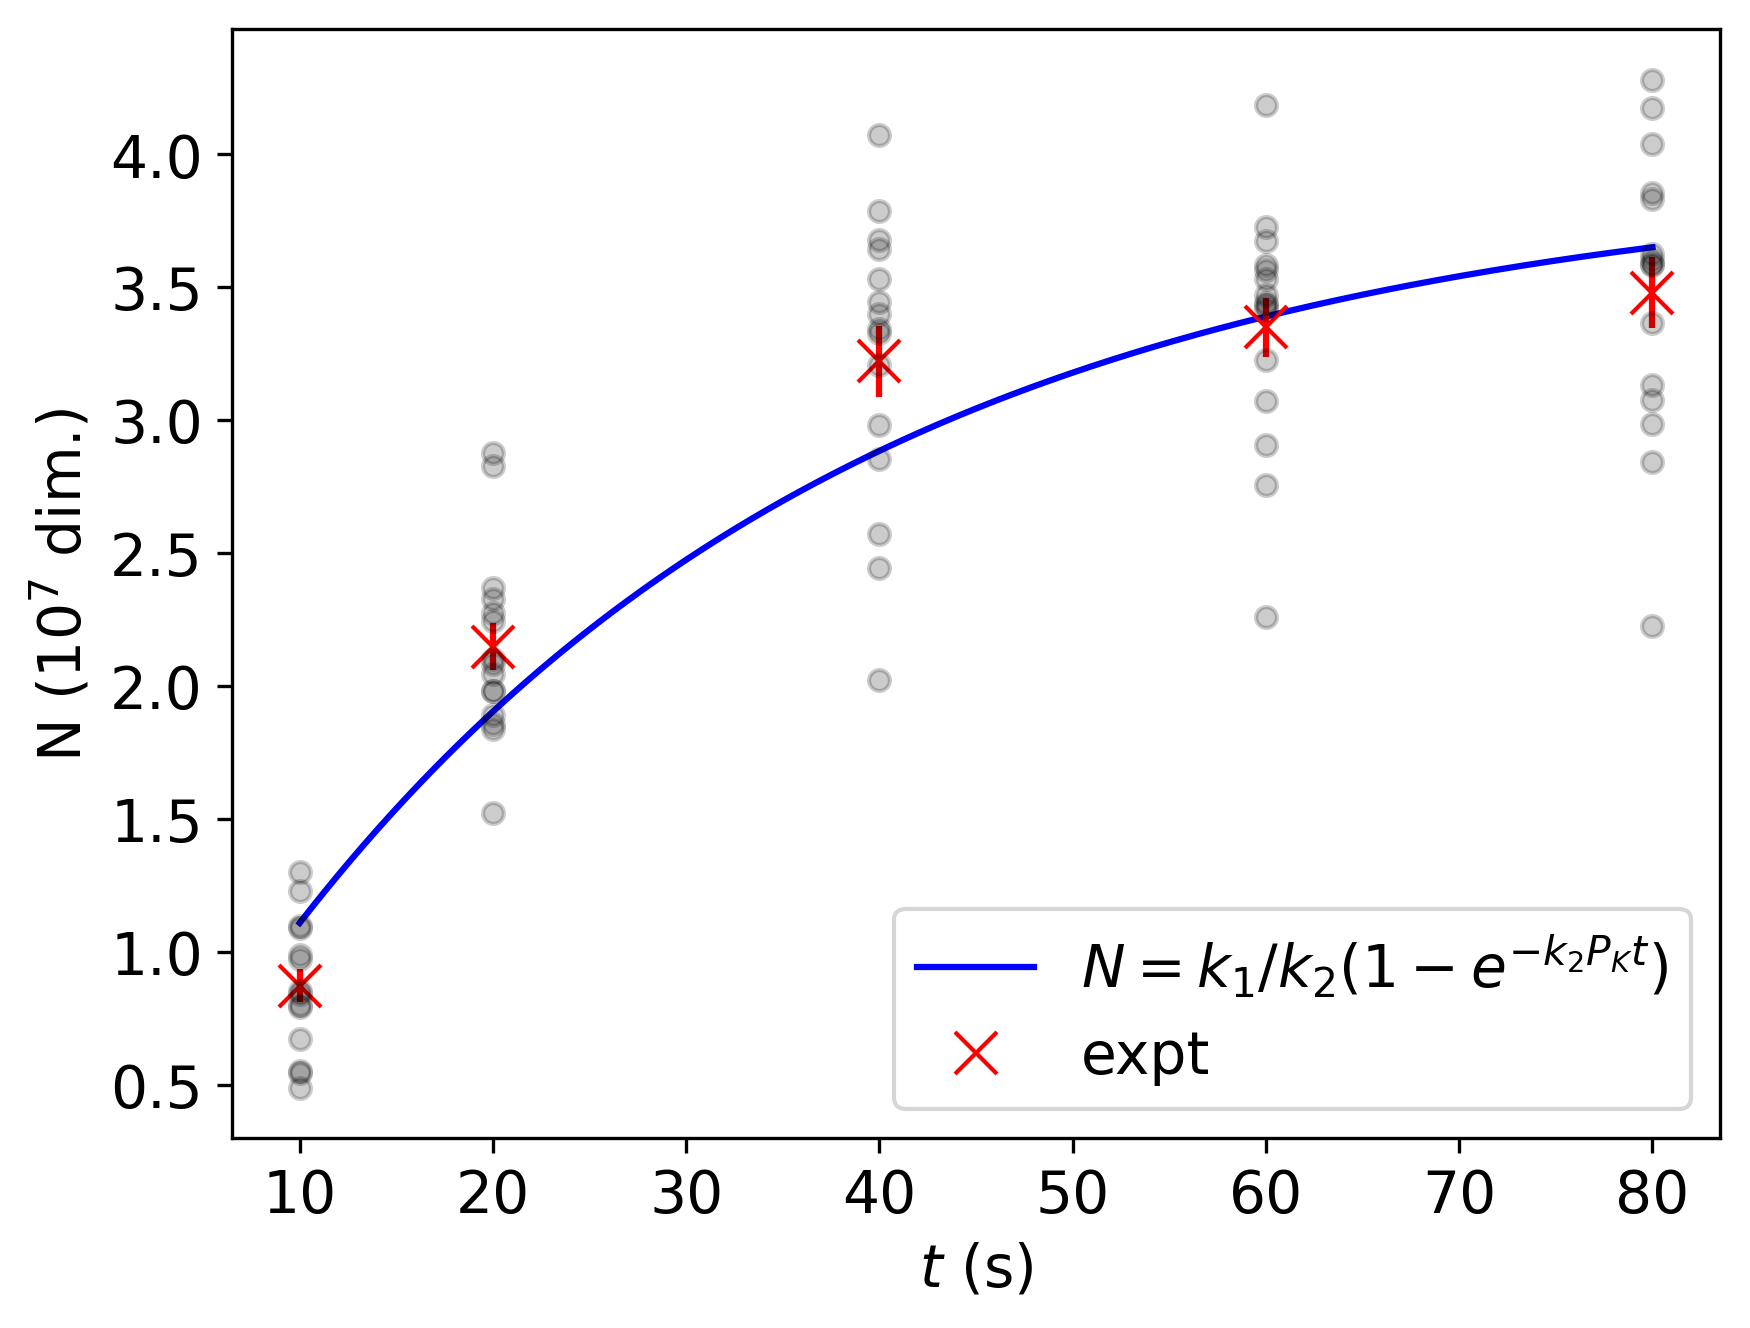

In [26]:
matplotlib.rcParams.update({'font.size': 14})
num_plot_scaling=10**7
N_list_copy=N_list.copy()
stats_dict={key:(np.mean(N_list_copy[key].copy()),np.std(N_list_copy[key].copy())) for key in N_list_copy.keys()}
for key in N_list_copy.keys():
    # copy_list=N_list[key].copy()
    for i in range(len(N_list_copy[key])):
        if abs(N_list_copy[key][i]-stats_dict[key][0])>2*stats_dict[key][1]:
            N_list_copy[key][i]=np.nan
y_plot=np.array([np.nanmean(n) for n in N_list_copy.values()])
x_plot=list(N_list_copy.keys())
popt,pcov=curve_fit(loading_dyn,x_plot,y_plot,(6e5,4.5e-2),sigma=[np.nanstd(N_list_copy[key]) for key in x_plot],absolute_sigma=True,bounds=([1e5,0],[np.inf,np.inf]))
print(popt)
print(np.sqrt(np.diag(pcov)))
xfit=np.linspace(min(x_plot),max(x_plot),num_plot_scaling)
yfit=loading_dyn(xfit,*popt)
# yfit=loading_dyn(xfit,6e5,4.5e-2)
fig,ax=plt.subplots(dpi=300)
ax.plot(xfit,yfit/num_plot_scaling,'-b',label='$N=k_1/k_2(1-e^{-k_2P_Kt})$')
ax.plot(x_plot, y_plot/num_plot_scaling, "xr",label='expt',markersize=10)
# print([stats_dict[key][1] for key in x_plot])
ax.errorbar(x_plot, y_plot/num_plot_scaling, np.array([np.nanstd(N_list_copy[key]) for key in x_plot])/(num_plot_scaling*np.sqrt(numtrials)),ls='none',color='r')
for key in N_list_copy.keys():
    plt.plot([key]*len(N_list_copy[key]),np.array(N_list_copy[key])/num_plot_scaling,'.k',alpha=0.2,markersize=10)
plt.ylabel(r'N ($10^7$ dim.)')
# ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))# ax.('sci')
plt.xlabel('$t$ (s)')
plt.tick_params(labelsize=14)
ax.legend()
# plt.savefig(os.path.join(os.getcwd(),'figures','Loading_time.png'),dpi=300)

[1.30196039e+06 3.31465817e-02]
[2.63064866e+05 1.10204542e-02]


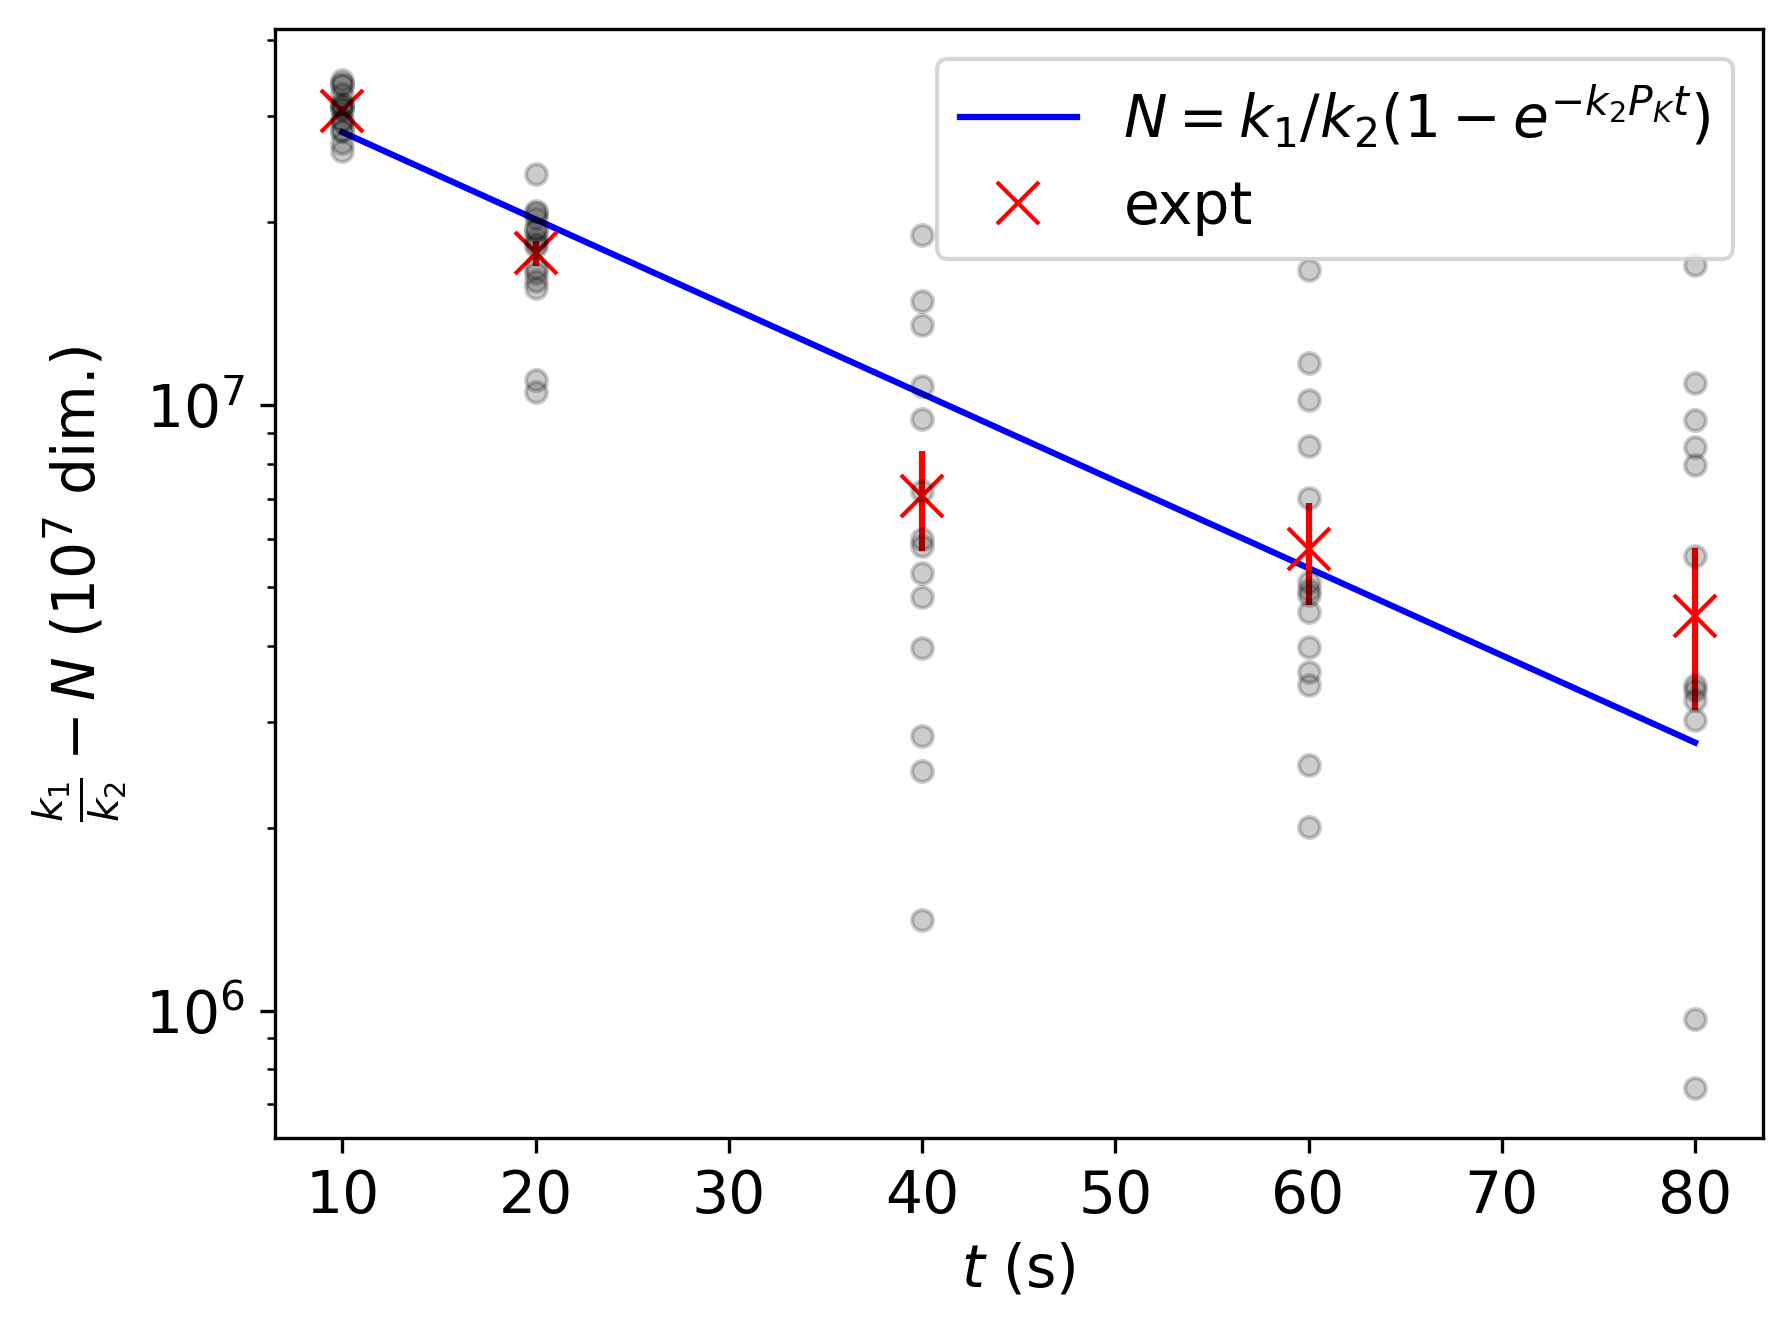

In [28]:
matplotlib.rcParams.update({'font.size': 14})
num_plot_scaling=1
N_list_copy=N_list.copy()
stats_dict={key:(np.mean(N_list_copy[key].copy()),np.std(N_list_copy[key].copy())) for key in N_list_copy.keys()}
for key in N_list_copy.keys():
    # copy_list=N_list[key].copy()
    for i in range(len(N_list_copy[key])):
        if abs(N_list_copy[key][i]-stats_dict[key][0])>2*stats_dict[key][1]:
            N_list_copy[key][i]=np.nan
y_plot=np.array([np.nanmean(n) for n in N_list_copy.values()])
x_plot=np.array(list(N_list_copy.keys()))
popt,pcov=curve_fit(loading_dyn,x_plot,y_plot,(6e5,4.5e-2),sigma=[np.nanstd(N_list_copy[key]) for key in x_plot],absolute_sigma=True,bounds=([1e5,0],[np.inf,np.inf]))
print(popt)
ratio=popt[0]/popt[1]
print(np.sqrt(np.diag(pcov)))
xfit=np.linspace(min(x_plot),max(x_plot),10000)
yfit=loading_dyn(xfit,*popt)
# yfit=loading_dyn(xfit,6e5,4.5e-2)

fig,ax=plt.subplots(dpi=300)
ax.semilogy(xfit,(ratio-yfit)/num_plot_scaling,'-b',label='$N=k_1/k_2(1-e^{-k_2P_Kt})$')
ax.semilogy(x_plot, (ratio-y_plot)/num_plot_scaling, "xr",label='expt',markersize=10)
# print([stats_dict[key][1] for key in x_plot])
errbars=np.array([np.nanstd(N_list_copy[key]) for key in x_plot])/(num_plot_scaling*np.sqrt(numtrials))
ax.errorbar(x_plot, (ratio-y_plot)/num_plot_scaling, errbars,ls='none',color='r')
for key in N_list_copy.keys():
    plt.semilogy([key]*len(N_list_copy[key]),(ratio-np.array(N_list_copy[key]))/num_plot_scaling,'.k',alpha=0.2,markersize=10)
plt.ylabel(r'$\frac{k_1}{k_2}-N$ ($10^7$ dim.)')
# ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))# ax.('sci')
plt.xlabel('$t$ (s)')
plt.tick_params(labelsize=14)
plt.tick_params(axis='y', which='minor')
# ax.set_yscale('log')
# ax.set_yticks([2e5,4e5,6e5,8e5,1e6,2e6,4e6,6e6,8e6,1e7])
# ax.yaxis.set_minor_locator(plt.MultipleLocator(1e6))
# ax.yaxis.set_minor_formatter()
# ax.minorticks_on()
ax.legend()
# plt.savefig(os.path.join(os.getcwd(),'figures','Loading_time.png'),dpi=300)

In [32]:
##CHI-SQUARED TEST
red_chi_sq=np.sum(np.divide(np.square(y_plot-loading_dyn(x_plot,*popt)),np.square(errbars)*numtrials))/3
red_chi_sq

0.6433157466962084

# NUM VS WIDTH

In [6]:
numscaling=10**7
# divide atomnums by 1e7
atomnums=np.array([datum.atom_number_px_sum()/numscaling for datum in d.data])
sigmas=[datum.popt_y[2]*6.45e-3*3 for datum in d.data]

#EXPECTED SIZE OF CLOUD WITHOUT INTERACTION
#rms radius of 7 coils. Scaled from mm to m
a=unp.sqrt(np.square(unp.uarray(np.linspace(45.1,70.2,7),[0.1]*7)).mean())*1e-3
#separation between the coils is estimated to achieve max field gradient with given R
dist=a/2
n=35
I=ufloat(5.39,0.01)
u0=4*np.pi*1e-7
#calculate field gradient in T/m. Multiply by 100 to get G/cm (conventional units)
def calc_A(a,dist,n,I,u0):
    return 3*u0*I*n*dist*a**2/(dist**2+a**2)**2.5
A=calc_A(a,dist,n,I,u0)
print('Field gradient in T/m:',A)
lambd=766.7*1e-9
k=2*np.pi/lambd
hbar=1.054571817*1e-34
tau=26.375*1e-9
gamma=1/tau
I_sat=2*np.pi**2*hbar*299792458/(3*tau*lambd**3)
I_incident=ufloat(26e-3,1e-3)/(np.pi*(ufloat(4.5e-3,0.5e-4))**2)
dipole=9.2740100783e-24*(4/3*3/2-2.00229421*1/2)
s0=I_incident/I_sat
delta_0=ufloat(3.34e7,6e5)
print('s0:',s0)
print('well edge:',2*np.pi*hbar*delta_0/(A*dipole))
#delta_0 calculated as follows: V detuned from 0.7V to -2V, double passed. assume precision of V=0.05V at peak absorption

def calc_kappa(A):
    return (dipole*A/(hbar*k))*8*hbar*k**2*s0*delta_0/(gamma*(1+s0+4*delta_0**2/gamma**2)**2)

kappa=calc_kappa(A)
print('Force constant:',kappa)
boltz=1.380649e-23
temp=ufloat(4.1e-3,3e-4)
x_rms=unp.sqrt(boltz*temp/kappa)*1000
print('non interacting x_rms:',x_rms)

Field gradient in T/m: 0.05998+/-0.00014
s0: 23.4+/-1.0
well edge: 0.0398+/-0.0007
Force constant: (9.94+/-0.33)e-19
non interacting x_rms: 0.239+/-0.010


[0.82244489 0.82265807 0.82287115 ... 1.69643813 1.69648825 1.69653836]
0.1767735367814871 -0.10247288120369888


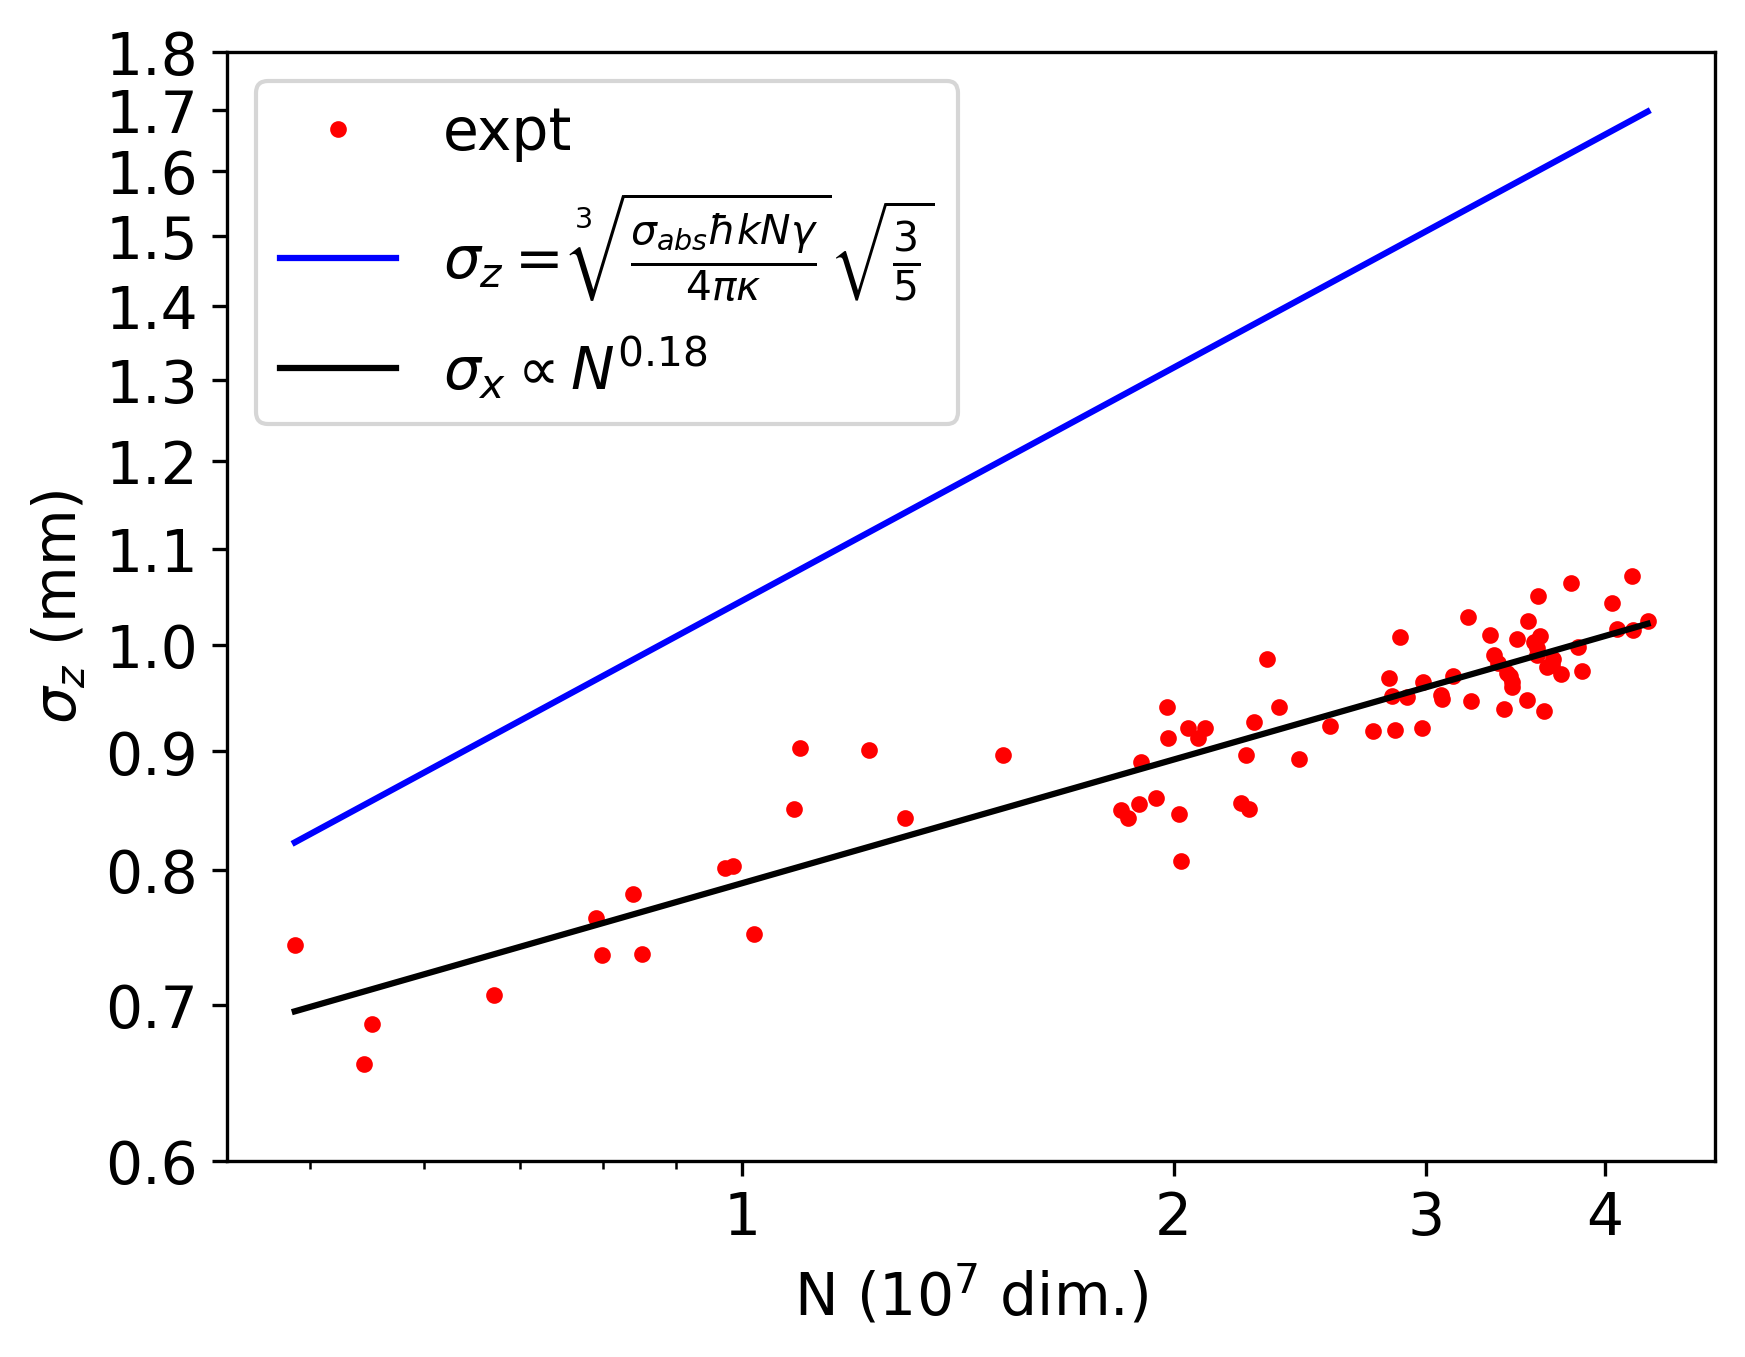

In [24]:
matplotlib.rcParams.update({'font.size': 14})
xlinspace=np.linspace(min(atomnums),max(atomnums),10000)
fig,ax=plt.subplots(dpi=300)
ax.plot(atomnums,sigmas,'.r',label='expt')
ax.set_ylabel('$\sigma_z$ (mm)')
ax.set_xlabel('N ($10^7$ dim.)')
# plt.plot(xlinspace/10**7,[x_rms]*10000,'-k',label='non-interacting atoms')
#with repulsion
CS=(766.7e-9)**2/(2*np.pi)
def r_repulse(x):
    #final sqrt(3/5) takes care of the fact that we want to find rms distance, not absolute boundary of blob
    return 1000*(CS*hbar*k*x*gamma/(4*np.pi*kappa.nominal_value))**(1/3)*np.sqrt(3/5)
repulse_xrms=r_repulse(xlinspace*1e7)
print(repulse_xrms)
ax.plot(xlinspace,repulse_xrms,'-b',label=r'$\sigma_z=\sqrt[3]{\frac{\sigma_{abs}\hbar kN\gamma}{4\pi\kappa}}\sqrt{\frac{3}{5}}$')

#fitting to a power law
fit_results=linregress(np.log10(atomnums),np.log10(sigmas))
print(fit_results.slope,fit_results.intercept)
ax.plot(xlinspace,np.power(xlinspace,fit_results.slope)*10**fit_results.intercept,'-k',label=r'$\sigma_x\propto N^{0.18}$')
# print(np.power(xlinspace,fit_results.slope)*fit_results.intercept)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xticks([1,2,3,4])
ax.set_yticks(np.arange(0.6, 1.8, 0.1))
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
ax.legend(loc='upper left')
plt.tick_params(labelsize=14)
# plt.savefig(os.path.join(os.getcwd(),'figures','sizeVSnum.png'),dpi=300)